In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score
)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## CNN

In [2]:
min_mel = -80
max_mel = 0

In [3]:
data_train_cnn = np.load("train_cnn.npz")
data_val_cnn = np.load("val_cnn.npz")

In [4]:
#X_train_cnn = (data_train_cnn["data"] - min_mel)/(max_mel-min_mel)
X_train_cnn = data_train_cnn["data"]
y_train_cnn = data_train_cnn["label"]

In [5]:
#X_val_cnn = (data_val_cnn["data"] - min_mel)/(max_mel-min_mel)
X_val_cnn = data_val_cnn["data"]
y_val_cnn = data_val_cnn["label"]

In [6]:
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1), name='conv2d_1'),
    tf.keras.layers.BatchNormalization(name="batchnorm_1"),
    tf.keras.layers.MaxPooling2D(2, 2, name='maxpool_1'),
    

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_2'),
   # tf.keras.layers.BatchNormalization(name="batchnorm_2"),
    tf.keras.layers.MaxPooling2D(2, 2, name='maxpool_2'),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', name='conv2d_3'),
   # tf.keras.layers.BatchNormalization(name="batchnorm_3"),
    tf.keras.layers.MaxPooling2D(2, 2, name='maxpool_3'),
    
    #tf.keras.layers.Dropout(0.25, name='dropout_1'),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(128, activation='relu', name='dense_1'),
    tf.keras.layers.Dropout(0.2, name="dropout_1"),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output')  # Output layer for binary classification
])

# Compile the model
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',  # Binary classification loss
    metrics=['accuracy']
)

# Display model summary
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 126, 126, 32)     128       
 tion)                                                           
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 63, 63, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 30, 30, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       73856     
                                                        

In [7]:
history_cnn = model_cnn.fit(X_train_cnn,
                    y_train_cnn,
                    epochs=10,
                    validation_data=(X_val_cnn, y_val_cnn), batch_size = 32)

Epoch 1/10
162/162 [==============================] - 64s 385ms/step - loss: 0.4442 - accuracy: 0.7831 - val_loss: 0.3596 - val_accuracy: 0.8524
Epoch 2/10
162/162 [==============================] - 63s 389ms/step - loss: 0.2065 - accuracy: 0.9273 - val_loss: 0.2758 - val_accuracy: 0.8811
Epoch 3/10
162/162 [==============================] - 61s 376ms/step - loss: 0.1132 - accuracy: 0.9610 - val_loss: 0.1847 - val_accuracy: 0.9305
Epoch 4/10
162/162 [==============================] - 61s 379ms/step - loss: 0.0652 - accuracy: 0.9824 - val_loss: 0.2970 - val_accuracy: 0.8734
Epoch 5/10
162/162 [==============================] - 62s 384ms/step - loss: 0.0420 - accuracy: 0.9888 - val_loss: 0.2978 - val_accuracy: 0.8825
Epoch 6/10
162/162 [==============================] - 62s 383ms/step - loss: 0.0286 - accuracy: 0.9940 - val_loss: 0.1101 - val_accuracy: 0.9564
Epoch 7/10
162/162 [==============================] - 61s 374ms/step - loss: 0.0181 - accuracy: 0.9967 - val_loss: 0.2594 - val_ac

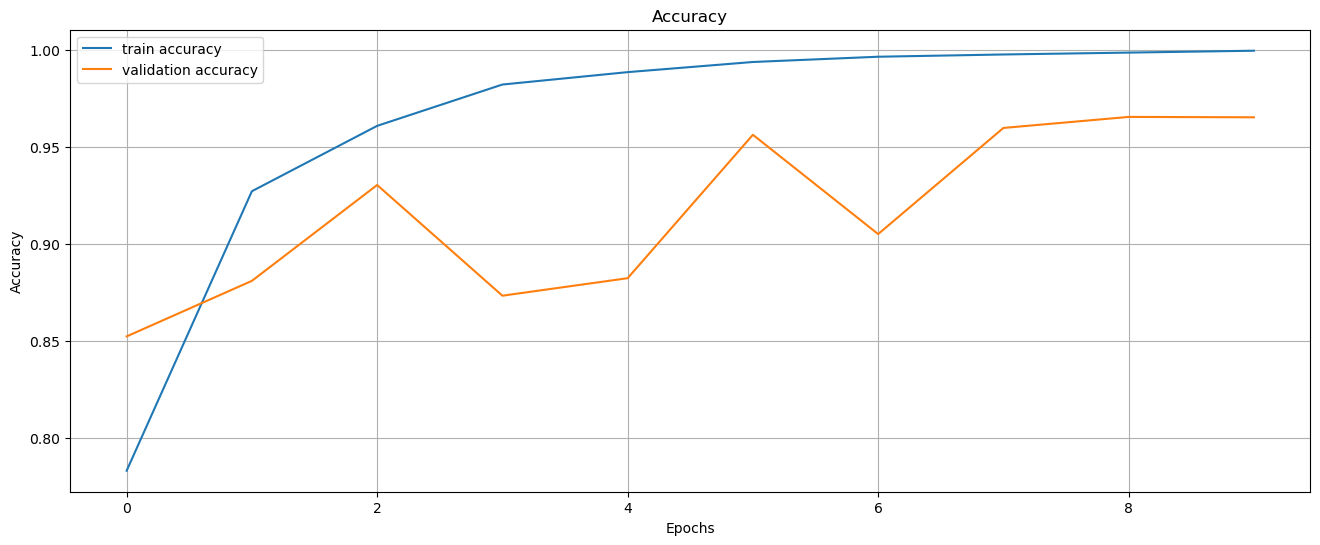

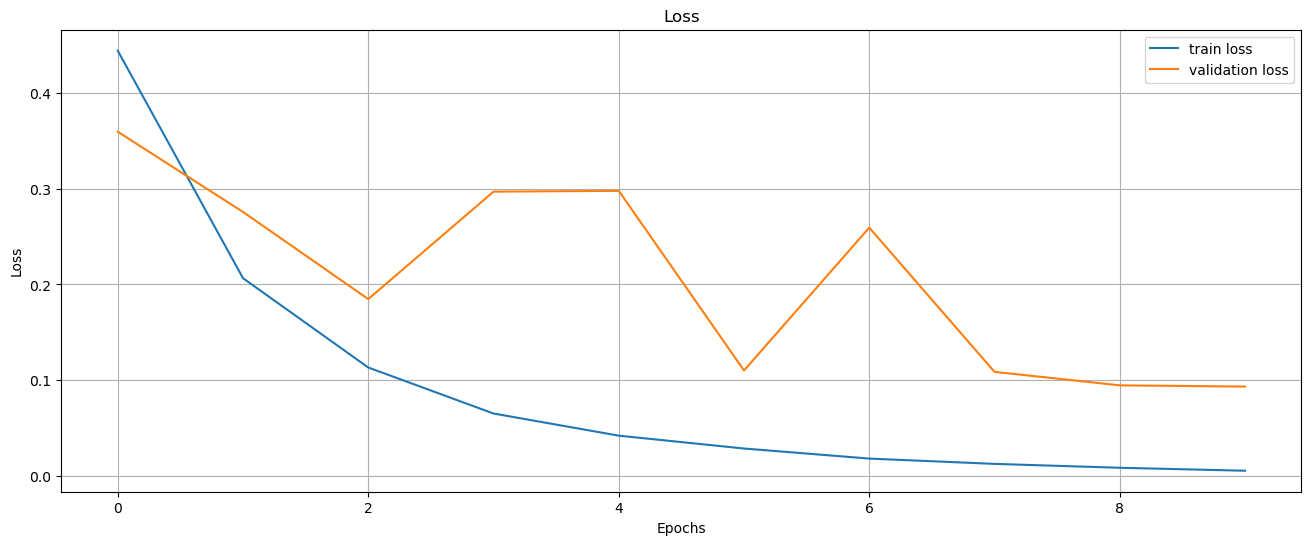

In [8]:
train_acc_cnn = history_cnn.history['accuracy']
val_acc_cnn = history_cnn.history['val_accuracy']
train_loss_cnn = history_cnn.history['loss']
val_loss_cnn = history_cnn.history['val_loss']
#train_f1 = history.history['f1_score']
#val_f1 = history.history['val_f1_score']

plt.figure(figsize=(16, 6))
plt.plot(train_acc_cnn, label="train accuracy")
plt.plot(val_acc_cnn, label="validation accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(train_loss_cnn, label="train loss")
plt.plot(val_loss_cnn, label="validation loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


160/160 [==============================] - 12s 76ms/step
Accuracy: 96.55%


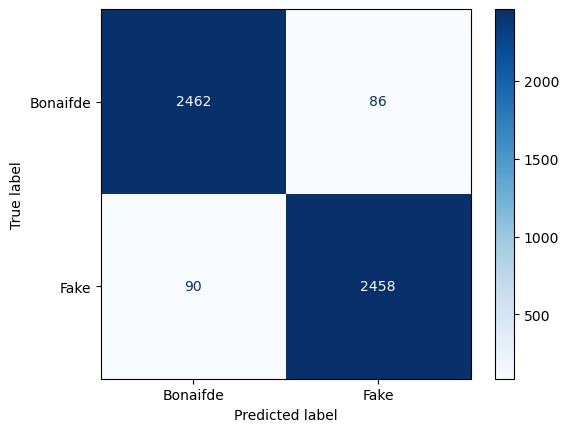

In [9]:

y_pred_cnn = model_cnn.predict(X_val_cnn)
# Convert probabilities to binary predictions (0 or 1)
y_pred_classes_cnn = (y_pred_cnn > 0.5).astype("int32")
y_pred_classes_cnn

#confusion matrix
cm_cnn = confusion_matrix(y_val_cnn, y_pred_classes_cnn)
# Display the confusion matrix
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=["Bonaifde", "Fake"])
disp_cnn.plot(cmap="Blues")

val_acc_cnn = accuracy_score(y_val_cnn, y_pred_classes_cnn)
print(f"Accuracy: {val_acc_cnn * 100:.2f}%")

## CNN-LSTM

In [9]:
data_train_cnn_lstm = np.load("train_32step.npz")
data_val_cnn_lstm = np.load("val_32step.npz")

In [10]:
#X_train_cnn_lstm = (data_train_cnn_lstm["data"] - min_mel)/(max_mel-min_mel)
X_train_cnn_lstm = data_train_cnn_lstm["data"]
y_train_cnn_lstm = data_train_cnn_lstm["label"]

In [11]:
#X_val_cnn_lstm = (data_val_cnn_lstm["data"]-min_mel)/(max_mel-min_mel)
X_val_cnn_lstm = data_val_cnn_lstm["data"]
y_val_cnn_lstm = data_val_cnn_lstm["label"]

In [12]:
import tensorflow as tf

# Time-distributed CNN-LSTM model
model_cnn_lstm = tf.keras.models.Sequential([
    # TimeDistributed CNN layers for spatial feature extraction
    tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'), 
                                     input_shape=(32, 128, 4, 1), name="conv2d_1"),  # Input shape corrected
    tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization(), name="batchnorm_1"),
    tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2), padding="same"), name="maxpool_1"),  # Padding same added

    tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'), name="conv2d_2"),
    tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2), padding="same"), name="maxpool_2"),  # Padding same added

    tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'), name="conv2d_3"),
    tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2), padding="same"), name="maxpool_3"),  # Padding same added

    # Flatten and reshape for LSTM
    tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten(), name="flatten"),  # Output: 8x(16*16*128)

    # LSTM layers for temporal feature learning
    tf.keras.layers.LSTM(128, return_sequences=True, name="lstm_1"),  # Output: 8x128
    tf.keras.layers.LSTM(128, return_sequences=False, name="lstm_2"),  # Output: 128

    # Fully connected layers
    tf.keras.layers.Dense(128, activation='relu', name="dense_1"),
    tf.keras.layers.Dropout(0.2, name="dropout_1"),

    # Output layer for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid', name="output")
])

# Compile the model
model_cnn_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',  # Binary classification loss
    metrics=['accuracy']
)

# Summary to check model architecture
model_cnn_lstm.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (TimeDistributed)  (None, 32, 128, 4, 32)    320       
                                                                 
 batchnorm_1 (TimeDistribute  (None, 32, 128, 4, 32)   128       
 d)                                                              
                                                                 
 maxpool_1 (TimeDistributed)  (None, 32, 64, 2, 32)    0         
                                                                 
 conv2d_2 (TimeDistributed)  (None, 32, 64, 2, 64)     18496     
                                                                 
 maxpool_2 (TimeDistributed)  (None, 32, 32, 1, 64)    0         
                                                                 
 conv2d_3 (TimeDistributed)  (None, 32, 32, 1, 128)    73856     
                                                      

In [13]:
history_cnn_lstm = model_cnn_lstm.fit(X_train_cnn_lstm,
                    y_train_cnn_lstm,
                    epochs=10,
                    validation_data=(X_val_cnn_lstm, y_val_cnn_lstm), batch_size = 32)

Epoch 1/10
162/162 [==============================] - 117s 680ms/step - loss: 0.4717 - accuracy: 0.7618 - val_loss: 0.5622 - val_accuracy: 0.7015
Epoch 2/10
162/162 [==============================] - 99s 614ms/step - loss: 0.2565 - accuracy: 0.8959 - val_loss: 0.3902 - val_accuracy: 0.8189
Epoch 3/10
162/162 [==============================] - 99s 615ms/step - loss: 0.1454 - accuracy: 0.9459 - val_loss: 0.3261 - val_accuracy: 0.8984
Epoch 4/10
162/162 [==============================] - 96s 592ms/step - loss: 0.1369 - accuracy: 0.9457 - val_loss: 0.1272 - val_accuracy: 0.9490
Epoch 5/10
162/162 [==============================] - 98s 604ms/step - loss: 0.0849 - accuracy: 0.9711 - val_loss: 0.1403 - val_accuracy: 0.9505
Epoch 6/10
162/162 [==============================] - 102s 632ms/step - loss: 0.0598 - accuracy: 0.9789 - val_loss: 0.1382 - val_accuracy: 0.9509
Epoch 7/10
162/162 [==============================] - 95s 585ms/step - loss: 0.0429 - accuracy: 0.9860 - val_loss: 0.1651 - val_

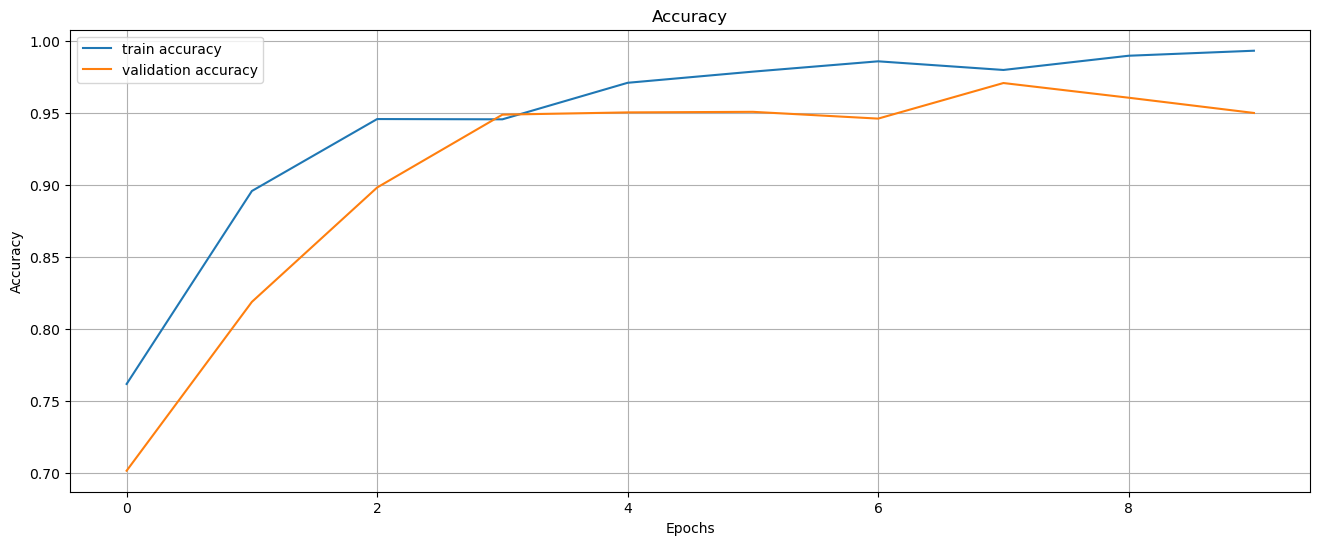

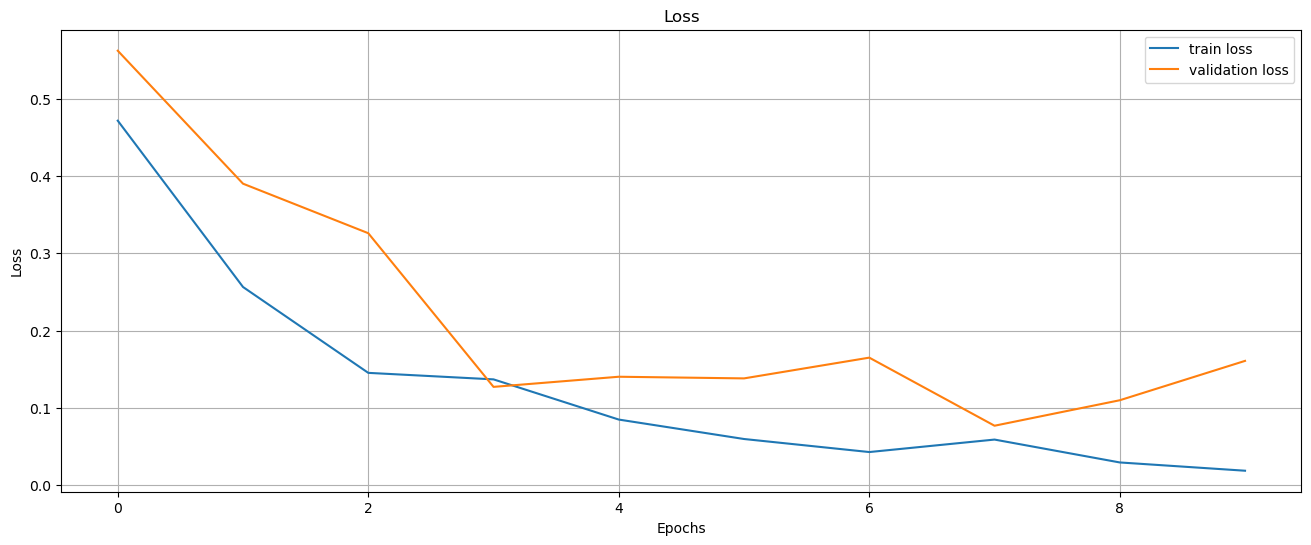

In [14]:
train_acc_cnn_lstm = history_cnn_lstm.history['accuracy']
val_acc_cnn_lstm = history_cnn_lstm.history['val_accuracy']
train_loss_cnn_lstm = history_cnn_lstm.history['loss']
val_loss_cnn_lstm = history_cnn_lstm.history['val_loss']
#train_f1 = history.history['f1_score']
#val_f1 = history.history['val_f1_score']

plt.figure(figsize=(16, 6))
plt.plot(train_acc_cnn_lstm, label="train accuracy")
plt.plot(val_acc_cnn_lstm, label="validation accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(train_loss_cnn_lstm, label="train loss")
plt.plot(val_loss_cnn_lstm, label="validation loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


160/160 [==============================] - 31s 170ms/step
Accuracy: 95.02%


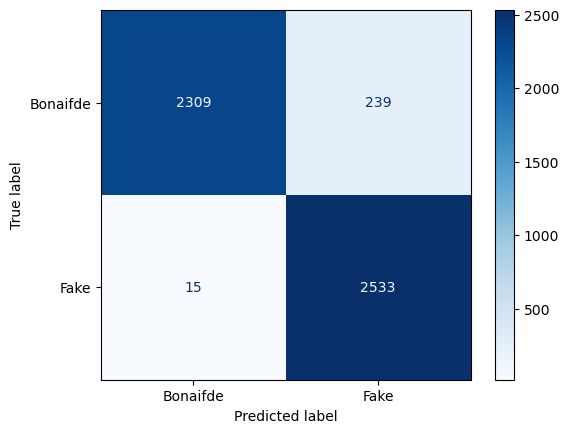

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_cnn_lstm = model_cnn_lstm.predict(X_val_cnn_lstm)
# Convert probabilities to binary predictions (0 or 1)
y_pred_classes_cnn_lstm = (y_pred_cnn_lstm > 0.5).astype("int32")

#confusion matrix
cm = confusion_matrix(y_val_cnn_lstm, y_pred_classes_cnn_lstm)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bonaifde", "Fake"])
disp.plot(cmap="Blues")

val_acc = accuracy_score(y_val_cnn_lstm, y_pred_classes_cnn_lstm)
print(f"Accuracy: {val_acc * 100:.2f}%")